# Crime Data Analysis in Los Angeles

## Desciption
A summary and preview of the dataset is given provided below.
<br>
It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

## Dataset

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## Data Import
In this section, we import the necessary Python libraries, load the dataset, and perform a quick summary to understand its structure and key characteristics.


### Required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Operation completed successfully ✅")

Operation completed successfully ✅


#### Data loading

In [4]:
# Load the dataset
df = pd.read_csv("src/crimes.csv") # , parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str}

print("Operation completed successfully ✅")

Operation completed successfully ✅


## Inspection and Validation

### Initial exploration

In [5]:
# Dataframe shape (Row x Columns)
print(f"Number of rows: {df.shape[0]}\nNumber of  columns: {df.shape[1]}")


Number of rows: 185715
Number of  columns: 12


In [6]:
# General summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  int64 
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(3), object(9)
memory usage: 17.0+ MB


In [7]:
# Display the first few rows of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


### Handling missing values

In [8]:
# Check the presence of missing values
df.isna().any()

DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA NAME       False
Crm Cd Desc     False
Vict Age        False
Vict Sex         True
Vict Descent     True
Weapon Desc      True
Status Desc     False
LOCATION        False
dtype: bool

In [9]:
# Check percentage of missing data per column
df.isnull().mean() * 100

DR_NO            0.000000
Date Rptd        0.000000
DATE OCC         0.000000
TIME OCC         0.000000
AREA NAME        0.000000
Crm Cd Desc      0.000000
Vict Age         0.000000
Vict Sex         0.005923
Vict Descent     0.005385
Weapon Desc     60.422152
Status Desc      0.000000
LOCATION         0.000000
dtype: float64

In [10]:
# Replace the missing values in 'Vict Sex' and 'Vict Descent' with their mode
df['Vict Sex'] = df['Vict Sex'].fillna(df['Vict Sex'].mode()[0])
df['Vict Descent'] = df['Vict Descent'].fillna(df['Vict Descent'].mode()[0])

# Replace the missing values in '"Weapon Desc"' with 'Unknown'
df['Weapon Desc'] = df['Weapon Desc'].fillna('Unknown')

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [11]:
# Display the total number of missing values per columns
df.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64

### Handle date and time series

In [12]:
#Convert date columns to datetime objects
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [13]:
# Pad TIME OCC with leading zeros to ensure it is 4 digits
df['TIME OCC'] = df['TIME OCC'].astype(str).str.zfill(4)

# Convert time columns to datetime objects
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M').dt.time

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [14]:
# Extract useful time-based features and create a new column for each
df['Year'] = df['DATE OCC'].dt.year
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()
df['Hour'] = df['TIME OCC'].apply(lambda x: x.hour)

print("Operation completed successfully ✅")

Operation completed successfully ✅


### Data Consistency Check in Categorical Columns

**AREA NAME**

In [15]:
# Check total number of unique values
print(f"Total number of unique values:{df['AREA NAME'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'AREA NAME':")
print((df['AREA NAME'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:21

Percentage distribution in 'AREA NAME':
AREA NAME
Central        8.05
Southwest      6.43
77th Street    6.32
Pacific        5.34
Hollywood      5.26
Southeast      5.15
Olympic        5.07
Newton         4.93
Van Nuys       4.64
N Hollywood    4.58
Wilshire       4.57
Topanga        4.57
Rampart        4.49
West Valley    4.36
West LA        4.26
Northeast      4.11
Devonshire     3.99
Mission        3.76
Harbor         3.56
Hollenbeck     3.33
Foothill       3.22
Name: proportion, dtype: float64


**Crm Cd Desc**

In [16]:
# Check total number of unique values
print(f"Total number of unique values:{df['Crm Cd Desc'].nunique()}")


# Check percentage distribution
print("\nPercentage distribution in 'Crm Cd Desc':")
print((df['Crm Cd Desc'].value_counts(normalize=True, dropna=False) * 100).round(2))

Total number of unique values:104

Percentage distribution in 'Crm Cd Desc':
Crm Cd Desc
THEFT OF IDENTITY                                 12.21
BATTERY - SIMPLE ASSAULT                          10.60
BURGLARY FROM VEHICLE                              7.43
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     7.12
INTIMATE PARTNER - SIMPLE ASSAULT                  6.45
                                                  ...  
BRIBERY                                            0.00
GRAND THEFT / INSURANCE FRAUD                      0.00
TILL TAP - GRAND THEFT ($950.01 & OVER)            0.00
DISHONEST EMPLOYEE ATTEMPTED THEFT                 0.00
LYNCHING                                           0.00
Name: proportion, Length: 104, dtype: float64


**Vict Sex**

In [17]:
# Check total number of unique values
print(f"Total number of unique values:{df['Vict Sex'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'Vict Sex':")
print((df['Vict Sex'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:4

Percentage distribution in 'Vict Sex':
Vict Sex
M    50.09
F    48.38
X     1.51
H     0.02
Name: proportion, dtype: float64


In [18]:
# change all 'H' to unknown 'X'
df['Vict Sex'] = df['Vict Sex'].replace('H', 'X')

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [19]:
# check the result
print("Percentage distribution")
print((df['Vict Sex'].value_counts(normalize=True, dropna=False) * 100).round(2))


Percentage distribution
Vict Sex
M    50.09
F    48.38
X     1.53
Name: proportion, dtype: float64


**Vict Descent**

In [20]:
# Check total number of unique values
print(f"Total number of unique values:{df['Vict Descent'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'Vict Descent':")
print((df['Vict Descent'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:20

Percentage distribution in 'Vict Descent':
Vict Descent
H    39.92
W    24.22
B    18.81
O     8.79
A     2.97
X     2.45
K     0.75
F     0.66
C     0.65
J     0.23
V     0.18
I     0.17
Z     0.08
P     0.04
U     0.03
D     0.01
L     0.01
S     0.01
G     0.01
-     0.00
Name: proportion, dtype: float64


In [21]:
# change all '-' to unknown 'X'
df['Vict Descent'] = df['Vict Descent'].replace('-', 'X')

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [22]:
# Check total number of unique values
print(f"Total number of unique values:{df['Vict Descent'].nunique()}")

Total number of unique values:19


**Weapon Desc**

In [23]:
# Check total number of unique values
print(f"Total number of unique values:{df['Weapon Desc'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'Weapon Desc':")
print((df['Weapon Desc'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:75

Percentage distribution in 'Weapon Desc':
Weapon Desc
Unknown                                           60.42
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    21.48
UNKNOWN WEAPON/OTHER WEAPON                        3.97
VERBAL THREAT                                      3.17
HAND GUN                                           2.37
                                                  ...  
ANTIQUE FIREARM                                    0.00
RELIC FIREARM                                      0.00
M-14 SEMIAUTOMATIC ASSAULT RIFLE                   0.00
BOWIE KNIFE                                        0.00
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                0.00
Name: proportion, Length: 75, dtype: float64


In [24]:
# change 'Unknown' to 'UNKNOWN WEAPON/OTHER WEAPON'
df['Weapon Desc'] = df['Weapon Desc'].replace('Unknown', 'UNKNOWN WEAPON/OTHER WEAPON')

print("Operation completed successfully ✅")

Operation completed successfully ✅


In [25]:
# Check total number of unique values
print(f"Total number of unique values:{df['Weapon Desc'].nunique()}")

Total number of unique values:74


**Status Desc**

In [26]:
# Check total number of unique values
print(f"Total number of unique values:{df['Status Desc'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'Status Desc':")
print((df['Status Desc'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:6

Percentage distribution in 'Status Desc':
Status Desc
Invest Cont     82.81
Adult Other      9.54
Adult Arrest     7.21
Juv Arrest       0.26
Juv Other        0.17
UNK              0.00
Name: proportion, dtype: float64


**LOCATION**

In [27]:
# Check total number of unique values
print(f"Total number of unique values:{df['LOCATION'].nunique()}")

# Check percentage distribution
print("\nPercentage distribution in 'LOCATION':")
print((df['LOCATION'].value_counts(normalize=True, dropna=False) * 100).round(2))


Total number of unique values:39286

Percentage distribution in 'LOCATION':
LOCATION
600 S  BROADWAY                             0.19
800 N  ALAMEDA                      ST      0.18
7TH                                         0.18
6TH                                         0.17
6TH                          ST             0.16
                                            ... 
EDGEWOOD                                    0.00
12700    KITTRIDGE                    ST    0.00
4100 W  59TH                         ST     0.00
11900    DORAL                        AV    0.00
7500 W  91ST                         ST     0.00
Name: proportion, Length: 39286, dtype: float64


### Final exploration

In [28]:
# Dataframe shape (Row x Columns)
print(f"Number of rows:{df.shape[0]}\nNumber of  columns: {df.shape[1]}")


Number of rows:185715
Number of  columns: 16


In [29]:
# General summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185715 non-null  object        
 8   Vict Descent  185715 non-null  object        
 9   Weapon Desc   185715 non-null  object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
 12  Year          185715 non-null  int32         
 13  Month         185715 non-null  int32         
 14  DayOfWeek     185715 non-null  object        
 15  Hour          185

In [30]:
# Check the presence of missing values
df.isna().any()

DR_NO           False
Date Rptd       False
DATE OCC        False
TIME OCC        False
AREA NAME       False
Crm Cd Desc     False
Vict Age        False
Vict Sex        False
Vict Descent    False
Weapon Desc     False
Status Desc     False
LOCATION        False
Year            False
Month           False
DayOfWeek       False
Hour            False
dtype: bool

In [31]:
# Check total number of unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


DR_NO: 185715 unique values
Date Rptd: 398 unique values
DATE OCC: 1152 unique values
TIME OCC: 1439 unique values
AREA NAME: 21 unique values
Crm Cd Desc: 104 unique values
Vict Age: 98 unique values
Vict Sex: 3 unique values
Vict Descent: 19 unique values
Weapon Desc: 74 unique values
Status Desc: 6 unique values
LOCATION: 39286 unique values
Year: 4 unique values
Month: 12 unique values
DayOfWeek: 7 unique values
Hour: 24 unique values


In [32]:
# Display the first few rows of the dataset
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,Year,Month,DayOfWeek,Hour
0,220314085,2022-07-22,2020-05-12,11:10:00,Southwest,THEFT OF IDENTITY,27,F,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,2500 S SYCAMORE AV,2020,5,Tuesday,11
1,222013040,2022-08-06,2020-06-04,16:20:00,Olympic,THEFT OF IDENTITY,60,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,3300 SAN MARINO ST,2020,6,Thursday,16
2,220614831,2022-08-18,2020-08-17,12:00:00,Hollywood,THEFT OF IDENTITY,28,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1900 TRANSIENT,2020,8,Monday,12
3,231207725,2023-02-27,2020-01-27,06:35:00,77th Street,THEFT OF IDENTITY,37,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6200 4TH AV,2020,1,Monday,6
4,220213256,2022-07-14,2020-07-14,09:00:00,Rampart,THEFT OF IDENTITY,79,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1200 W 7TH ST,2020,7,Tuesday,9


In [33]:
# Statistical summary of numerical columns
df.describe()

,DR_NO,Date Rptd,DATE OCC,Vict Age,Year,Month,Hour
count,1.857150e+05,185715,185715,185715.000000,185715.000000,185715.000000,185715.000000
mean,2.255781e+08,2022-12-12 01:50:25.325902848,2022-11-27 19:04:55.711170560,39.999257,2022.411114,6.516076,12.813079
min,2.009072e+08,2022-06-01 00:00:00,2020-01-01 00:00:00,2.000000,2020.000000,1.000000,0.000000
25%,2.210108e+08,2022-09-04 00:00:00,2022-08-25 00:00:00,28.000000,2022.000000,4.000000,8.000000
50%,2.220114e+08,2022-12-10 00:00:00,2022-12-02 00:00:00,37.000000,2022.000000,6.000000,13.000000
75%,2.310044e+08,2023-03-20 00:00:00,2023-03-12 00:00:00,50.000000,2023.000000,9.000000,18.000000
max,2.399097e+08,2023-07-03 00:00:00,2023-07-03 00:00:00,99.000000,2023.000000,12.000000,23.000000
std,5.017438e+06,NaN,NaN,15.450227,0.527180,3.329724,6.551456


In [34]:
# Save the cleaned dataset
df.to_csv("src/crimes_cleaned.csv", index=False)

print("Operation completed successfully ✅")

Operation completed successfully ✅


## Load cleaned data

In [35]:
# Load new dataset
crimes = pd.read_csv("src/crimes_cleaned.csv")

print("Operation completed successfully ✅")

Operation completed successfully ✅


**Overview**
- The dataset contains 185,715 crime records in Los Angeles.
- Columns include crime details, victim info, weapon used, and timestamps.
- Data types are cleaned and missing values handled.

In [36]:
# Summary of the dataset
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185715 non-null  object
 8   Vict Descent  185715 non-null  object
 9   Weapon Desc   185715 non-null  object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
 12  Year          185715 non-null  int64 
 13  Month         185715 non-null  int64 
 14  DayOfWeek     185715 non-null  object
 15  Hour          185715 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 22.7+ MB


## Features Analysis
In this section, we explore key features such as victim demographics, crime types, areas, and time patterns. 

### Analyze Temporal Trends
- Visualize crime trends over years, months, and hours.
- Identify peak crime periods for deeper analysis.

**Yearly distribution**

In [37]:
# Group your crimes by year and count the number of crime
crimes_per_year = crimes.groupby('Year').size().reset_index(name='Number of crimes')

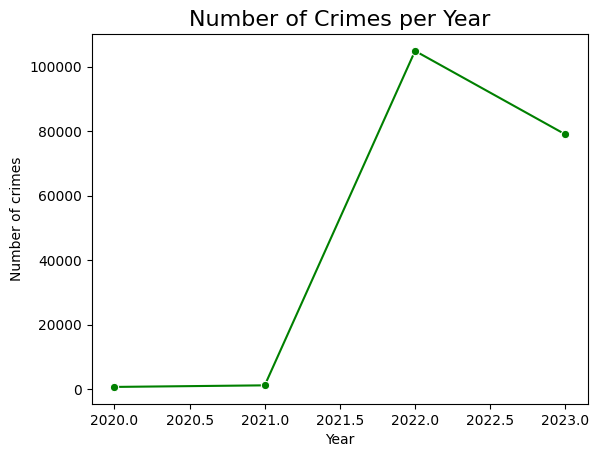

In [38]:
#Create line plot
sns.lineplot(
    data=crimes_per_year,
    x='Year',
    y='Number of crimes',
    marker='o',  # Add markers for each data point
    color='green',
)

# Add title
plt.title('Number of Crimes per Year', fontsize=16)

# Show the plot
plt.show()

**Continuous distribution over the years**

In [39]:
# Group crimes by Year and Month, then count occurrences
monthly_trend = crimes.groupby(['Year', 'Month']).size().reset_index(name='Number of crimes')

# Calculate a continuous month index
monthly_trend['Continuous_Month'] = (monthly_trend['Year'] - monthly_trend['Year'].min()) * 12 + monthly_trend['Month']

print("Operation completed successfully ✅")


Operation completed successfully ✅


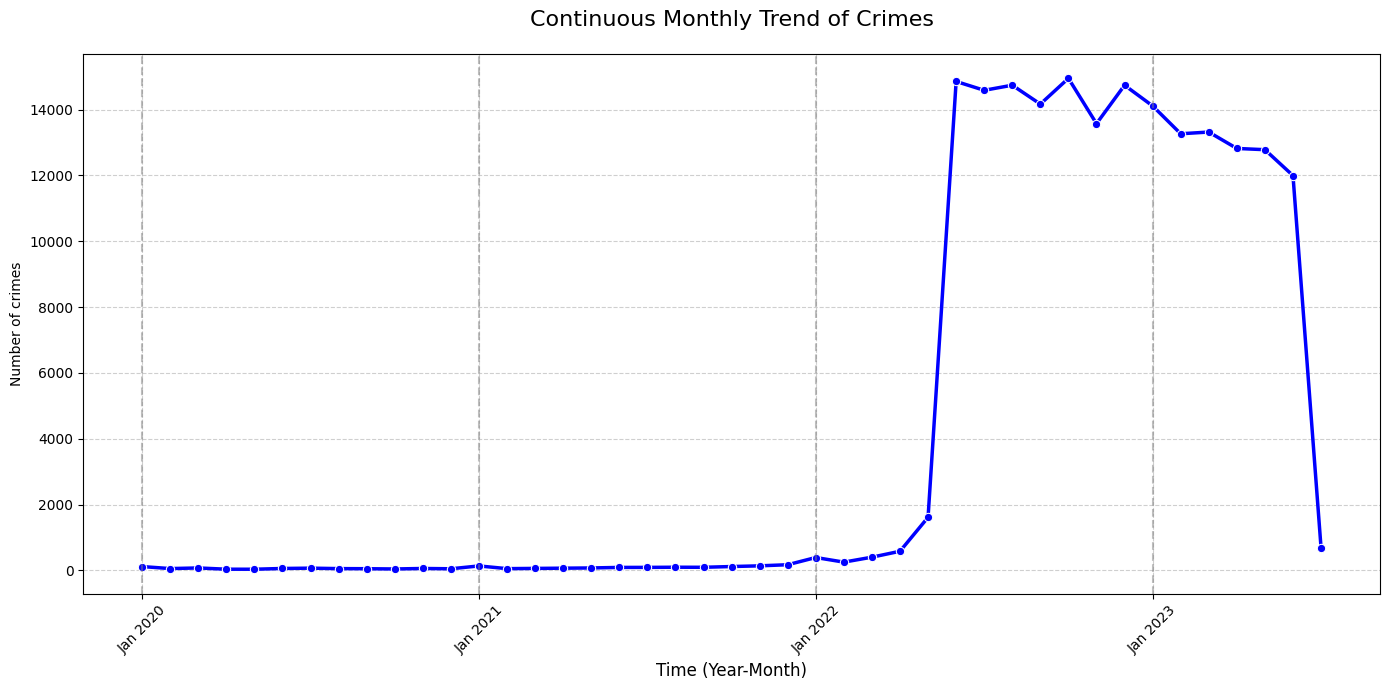

In [40]:

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='Continuous_Month',
    y='Number of crimes',
    marker='o',
    color='blue',
    linewidth=2.5
)

# Customize x-axis ticks
years = monthly_trend['Year'].unique()
xticks = [(year - years.min()) * 12 + 1 for year in years]
xtick_labels = [f"Jan {year}" for year in years]
plt.xticks(xticks, xtick_labels, rotation=45)

# Add vertical lines for each year
for year in years:
    year_start = (year - years.min()) * 12 + 1
    plt.axvline(x=year_start, color='gray', linestyle='--', alpha=0.5)
    
# Add title and labels
plt.title('Continuous Monthly Trend of Crimes', fontsize=16, pad=20)
plt.xlabel('Time (Year-Month)', fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

**Hourly distribution**

In [41]:
# Group your crimes by hour and count the number of crimes
crimes_per_hour = crimes.groupby('Hour').size().reset_index(name='Number of crimes')

print("Operation completed successfully ✅")

Operation completed successfully ✅


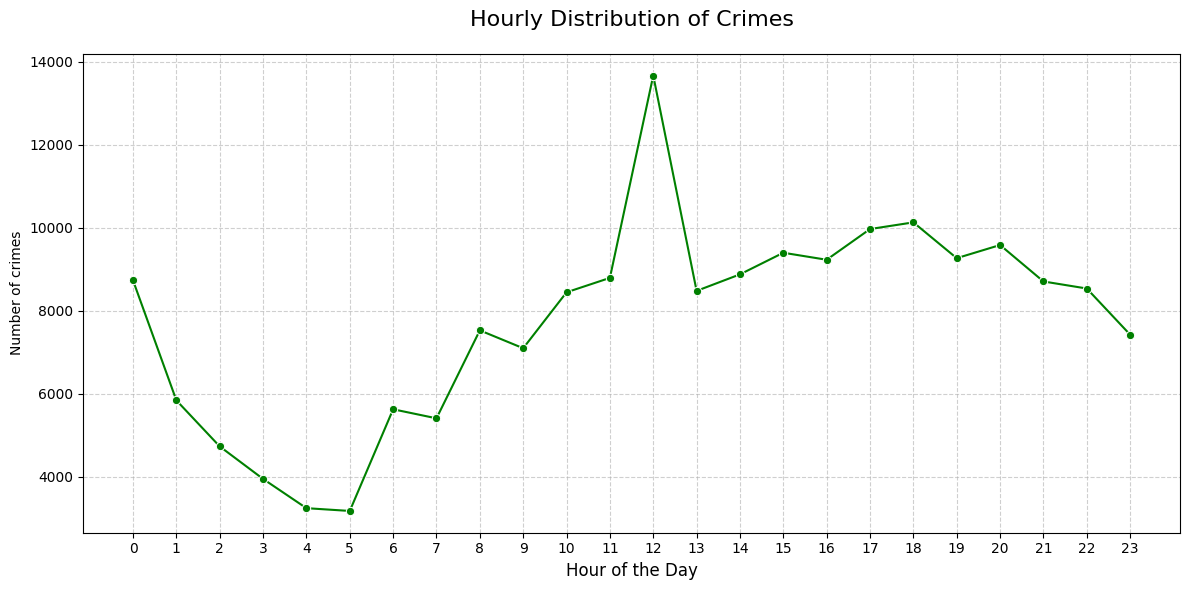

In [42]:
# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=crimes_per_hour,
    x='Hour',
    y='Number of crimes',
    marker='o',  # Add markers for each data point
    color='green',
)

# Add title and labels
plt.title('Hourly Distribution of Crimes', fontsize=16, pad=20)
plt.xlabel('Hour of the Day', fontsize=12)

# Set x-axis ticks
plt.xticks(range(0, 24))

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


**Hourly distribution hotspot over the days**

In [43]:
# Group your crimes by day and hour and count the number of crimes
hourly_trend = crimes.groupby(['DayOfWeek', 'Hour']).size().reset_index(name='Number of crimes')

# Pivot the data for a heatmap
heatmap_data = hourly_trend.pivot(index='DayOfWeek', columns='Hour', values='Number of crimes')

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

print("Operation completed successfully ✅")

Operation completed successfully ✅


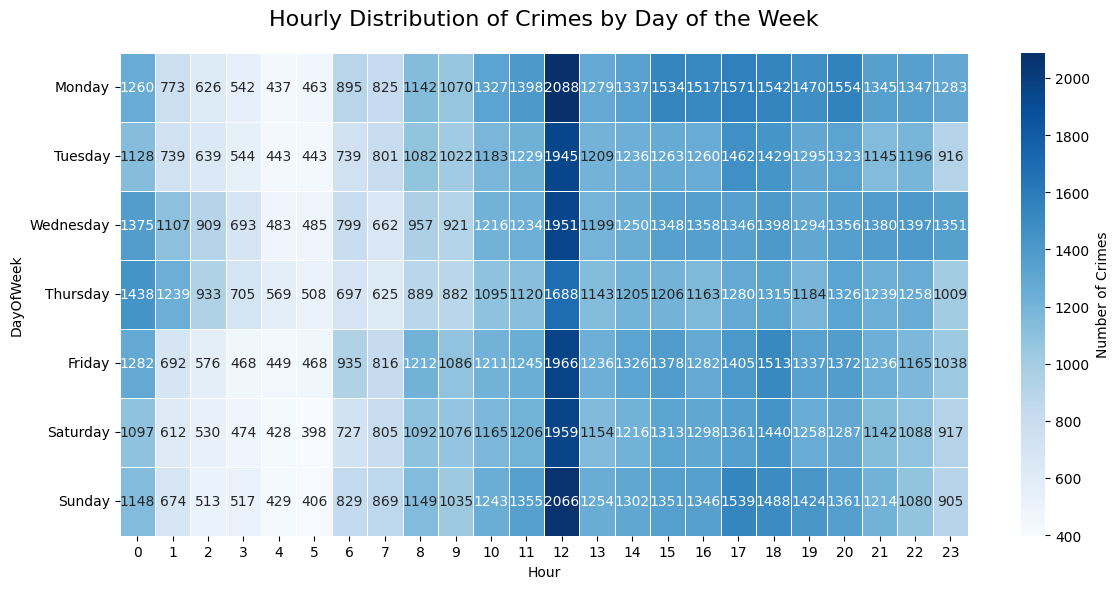

In [44]:
# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='Blues',
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Number of Crimes'},
    yticklabels=day_order
)

# Add title
plt.title('Hourly Distribution of Crimes by Day of the Week', fontsize=16, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

### Analyze Crime by Area
- Identify neighborhoods with high crime rates.
- Useful for local safety insights.

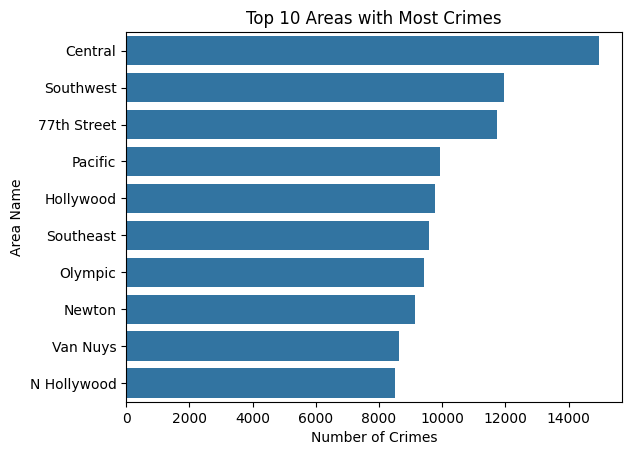

In [45]:
# Top 10 areas with most crimes
top_areas = crimes['AREA NAME'].value_counts().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=top_areas.values, y=top_areas.index)

# Add labels and title
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.title("Top 10 Areas with Most Crimes")

# Show the plot
plt.show()

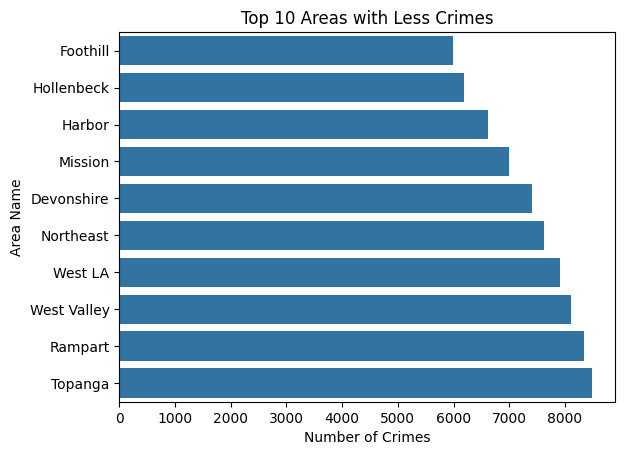

In [46]:
# Top 10 areas with less crimes
bottom_areas = crimes['AREA NAME'].value_counts().sort_values().head(10)

# Plot
sns.barplot(x=bottom_areas.values, y=bottom_areas.index)

# Add labels and title
plt.xlabel("Number of Crimes")
plt.ylabel("Area Name")
plt.title("Top 10 Areas with Less Crimes")

# Show the plot
plt.show()

### Analyze Crime Type
- Examine most frequent types of crimes.
- Can help prioritize law enforcement efforts.

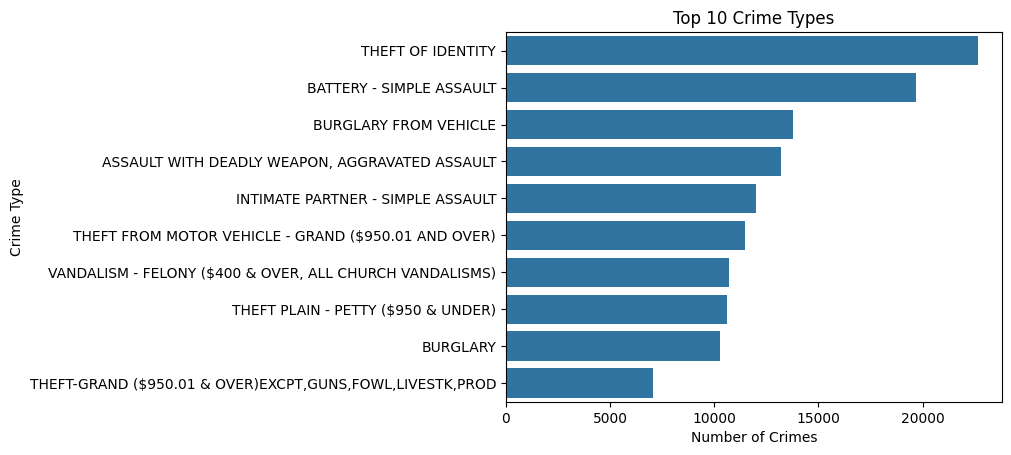

In [47]:
# Top 10 Most Crime Types
top_crimes_type = crimes['Crm Cd Desc'].value_counts().sort_values(ascending=False).head(10)

# Plot
sns.barplot(x=top_crimes_type.values, y=top_crimes_type.index)

# Add labels and title
plt.xlabel("Number of Crimes")
plt.ylabel("Crime Type")
plt.title("Top 10 Crime Types")

# Show the plot
plt.show()


### Victim Analysis
- Explore demographic characteristics of victims (Sex, Descent, Age).
- Identify any patterns or disparities.

#### Distribution by Sex

In [48]:
# Calculate the percentage of crimes for each sex
sex_proportions = crimes['Vict Sex'].value_counts(normalize=True) * 100
sex_proportions = sex_proportions.sort_values(ascending=False).reset_index()
sex_proportions.columns = ['Vict Sex', 'Percentage']

print("Operation completed successfully ✅")

Operation completed successfully ✅


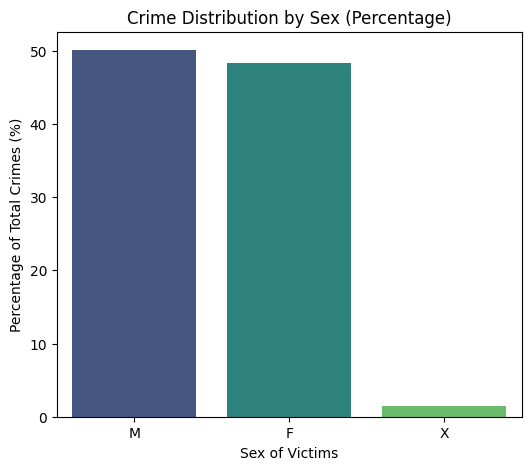

In [49]:
# Plot
plt.figure(figsize=(6, 5))
sns.barplot(
    x='Vict Sex', 
    y='Percentage', 
    data=sex_proportions,
    hue = 'Vict Sex',
    palette='viridis'
)

# Add labels and title
plt.title('Crime Distribution by Sex (Percentage)')
plt.ylabel('Percentage of Total Crimes (%)')
plt.xlabel('Sex of Victims')

# Show the plot
plt.show()

#### Distribution by Descent

In [50]:
# Calculate the percentage of crimes for each sex
Descent_proportions = crimes['Vict Descent'].value_counts(normalize=True) * 100
Descent_proportions = Descent_proportions.sort_values(ascending=False).reset_index()
Descent_proportions.columns = ['Vict Descent', 'Percentage']

print("Operation completed successfully ✅")

Operation completed successfully ✅


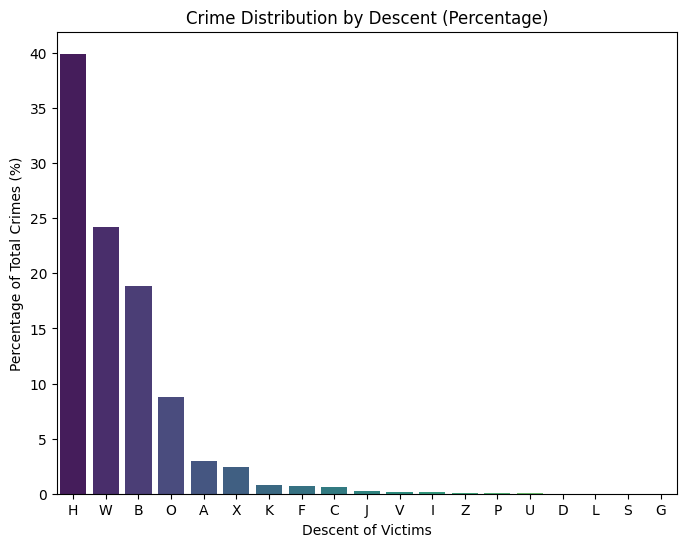

In [51]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Vict Descent', 
    y='Percentage', 
    data=Descent_proportions,
    hue = 'Vict Descent',
    palette='viridis'
)

# Add labels and title
plt.title('Crime Distribution by Descent (Percentage)')
plt.ylabel('Percentage of Total Crimes (%)')
plt.xlabel('Descent of Victims')

# Show the plot
plt.show()

#### Age distribution

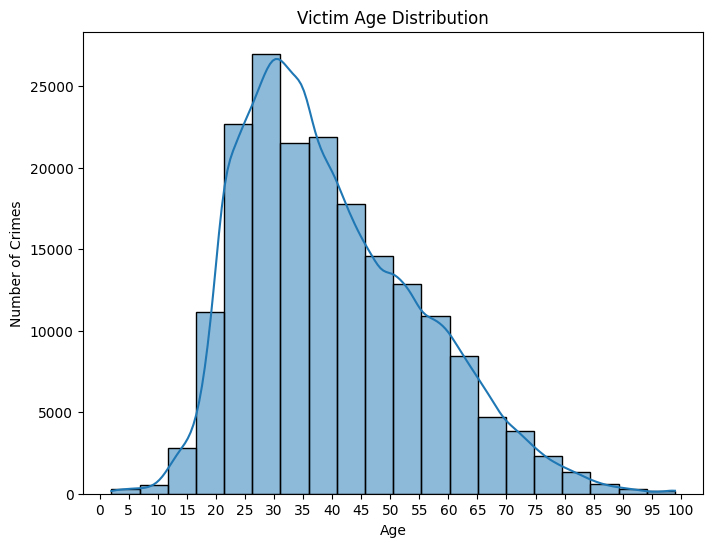

In [52]:
# Plot
plt.figure(figsize=(8, 6))
sns.histplot(crimes['Vict Age'], bins=20, kde=True)

# Set x-axis ticks
plt.xticks(range(0, 105,5))

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Number of Crimes")
plt.title("Victim Age Distribution")

# Show the plot
plt.show()

**Distribution by age groupe**

In [53]:
# Age group definition
bins = [0, 12, 18, 30, 45, 60, 100]
labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-30)', 'Adult (31-45)', 'Middle Age (46-60)', 'Senior (60+)']

# Create a new column 'Age Group' based on the defined bins and labels
crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins=bins, labels=labels, right=False)

print("Operation completed successfully ✅")

Operation completed successfully ✅


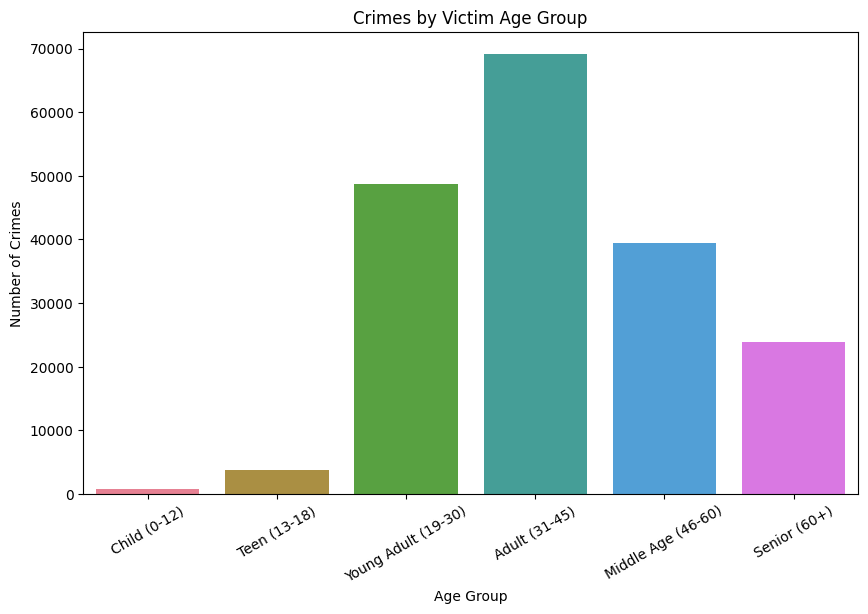

In [54]:
# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Age Group', data=crimes, hue='Age Group', palette='husl', order=labels)

# Add labels and title
plt.title("Crimes by Victim Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")

# Rotate x-axis labels
plt.xticks(rotation=30)

# Show the plot
plt.show()

**Crime status distribution**

In [55]:
# Calculate the percentage of crimes for Status Desc
Status_proportions = crimes['Status Desc'].value_counts(normalize=True) * 100
Status_proportions = Status_proportions.sort_values(ascending=False).reset_index()
Status_proportions.columns = ['Status Desc', 'Percentage']

print("Operation completed successfully ✅")

Operation completed successfully ✅


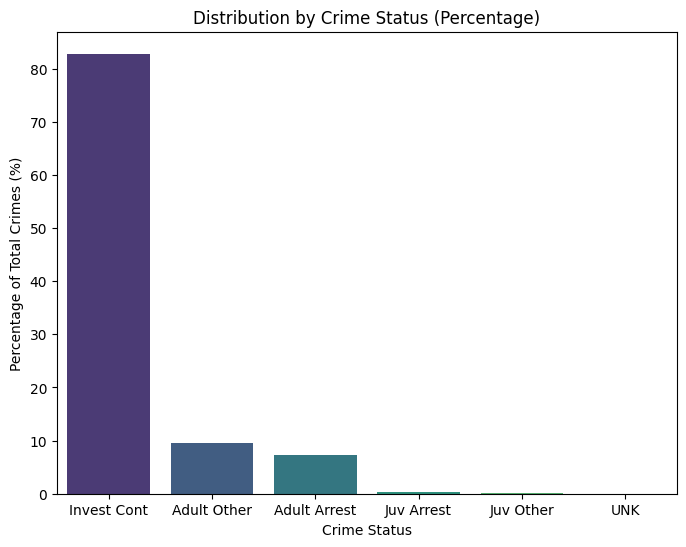

In [56]:
# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Status Desc', 
    y='Percentage', 
    data=Status_proportions,
    hue = 'Status Desc',
    palette='viridis'
)

# Add labels and title
plt.title('Distribution by Crime Status (Percentage)')
plt.ylabel('Percentage of Total Crimes (%)')
plt.xlabel('Crime Status')

# Show the plot
plt.show()

## Cross-Feature Analysis
In this section, we explore relationships between key features such as victim demographics, crime types, areas, and time patterns.  
The goal is to uncover trends that may explain when and where crimes occur most frequently, and which demographic groups are most affected.


### Crimes by Area and Year

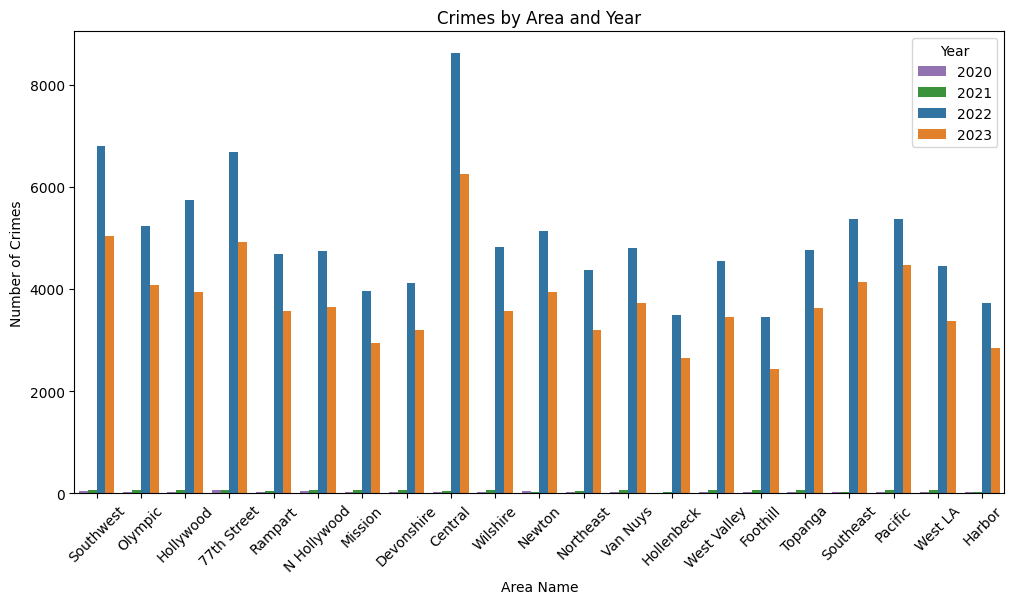

In [57]:
# Color definition
year_colors = {
    2019: "#d62728",  # Red
    2020: "#9467bd",  # Orange
    2021: "#2ca02c",  # Green
    2022: "#1f77b4",  # Blue
    2023: "#ff7f0e"   # Purple
}

# Plot
plt.figure(figsize=(12,6))
sns.countplot(x='AREA NAME', hue='Year', data=crimes, palette=year_colors)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Area and Year")

# Show the plot
plt.show()

### Crimes by Age Group and Sex

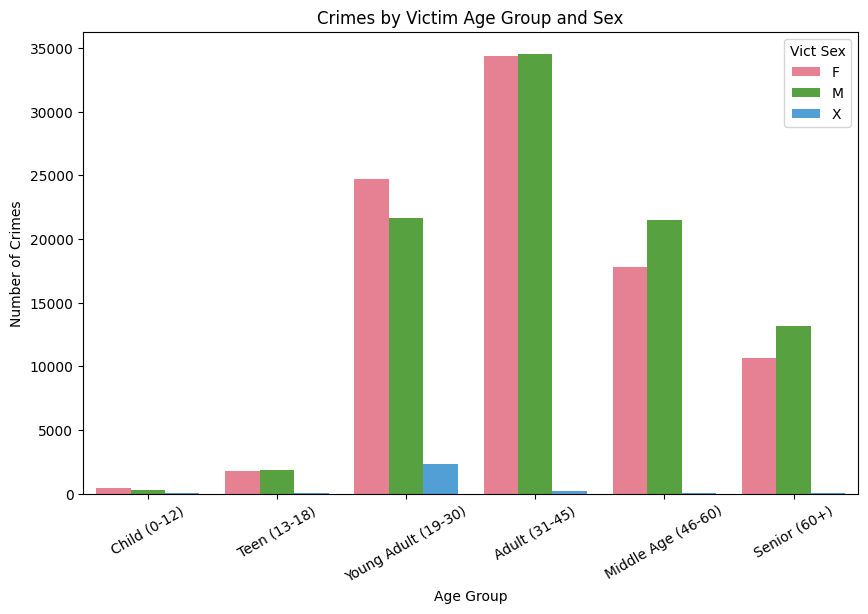

In [58]:
# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Age Group', hue='Vict Sex', data=crimes, palette='husl')

# Rotate x-axis labels
plt.xticks(rotation=30)

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Victim Age Group and Sex")

# Show the plot
plt.show()